In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from PointSystem import PointSystem

In [10]:
import random, copy
from perlin_noise import PerlinNoise

In [11]:
N = 2       # размерность системы
M = 30     # число точек

In [12]:
noise_generator = PerlinNoise(octaves=2, seed=1)
ng = lambda point: noise_generator(point) * 10 + 6

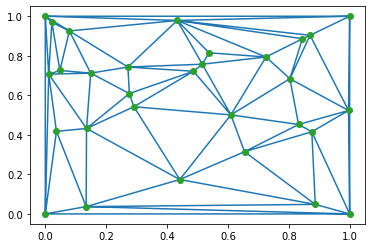

(None, 0.6727272727272727)

In [13]:
ps = PointSystem(M, N)
# x, y = points.T
# plt.scatter(x,y)
# plt.show()
tri = ps.triangulation
points = ps.points
plt.triplot(points[:,0], points[:,1], tri.simplices)
plt.plot(points[:,0], points[:,1], 'o')
plt.show(), ps.evaluate(ng)

In [14]:
PSs: list[PointSystem] = list()
for i in range(100):
    ps = PointSystem(M, N)
    e = ps.evaluate(ng)
    PSs.append((ps, e))
PSs.sort(key=lambda d: d[1], reverse=True)
# PSs

In [15]:
newPSs = list()
while len(newPSs) < M:
    i = random.choice(range(M))
    prob = np.exp(-(i/M))
    if random.random() < prob:
        newPS = copy.deepcopy(PSs[i][0])
        newPS.Mutate()
        newPSs.append((0, newPS.evaluate(ng)))
newPSs

IndexError: tuple index out of range

In [12]:
a = np.array([[0, 1], [2, 3]])
b = np.array([4, 5])
a, b

(array([[0, 1],
        [2, 3]]),
 array([4, 5]))

In [15]:
np.vstack((a, b))

array([[0, 1],
       [2, 3],
       [4, 5]])

In [71]:
indptr, indices = tri.vertex_neighbor_vertices
k = 0
indices[indptr[k]:indptr[k+1]]

array([42, 25, 60,  9, 11, 28,  4, 86], dtype=int32)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from perlin_noise import PerlinNoise

In [10]:
noise_generator = PerlinNoise(octaves=2, seed=1)
n, m = 100, 100
# ng = lambda i, j: noise_generator([i/n, j/m]) * 10 + 6
noise = [[ng([i/n, j/n]) for j in range(n)] for i in range(n)]

fig = go.Figure(data=[
    go.Surface(z=noise)
    ])
fig.update_layout(title='surface', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

fig.show()